In [94]:
import numpy as np
import math
import matplotlib.pyplot as plt

def add(V, n):
    V.append(n)
    return V

def maximo(V):
    maximo = max(V)
    return maximo

def minimo(V):
    minimo = min(V)
    return minimo

def quantElem(V):
    quantElem = len(V)
    return quantElem

def somaElem(V):
    soma = 0
    tam = len(V)
    for i in range(tam):
        soma += V[i]
    return soma

def somaElemQuadrado(V):
    soma = 0
    tam = len(V)
    for i in range(tam):
        soma += V[i]**2
    return soma

def media(V):
    tam = len(V)
    soma = 0
    for i in range(tam):
        soma += V[i]
    media = soma/tam
    return media

def mediaGeo(V):
    tam = len(V)
    mg = 1
    for i in range(tam):
        mg *= math.pow(V[i], 1/tam)
    return mg
    
def mediaHarm(V):
    tam = len(V)
    soma = 0
    for i in range(tam):
        soma += 1/V[i]
    mh = tam/soma
    return mh
    
def mediaQuad(V):
    tam = len(V)
    soma = 0
    for i in range(tam):
        soma += V[i]**(2)
    mq = math.sqrt(soma/tam)
    return mq

def mediana(V):
    vCresc = cresc(V)
    tam = len(V)
    if tam%2 != 0:
        mediana = vCresc[int((tam+1)/2)-1]
    else:
        mediana = (vCresc[int(tam/2)-1]+vCresc[int((tam/2))])/2
    return mediana

def quartil(V):
    tam = len(V)
    if tam>2:
        vCresc = cresc(V)
        V1 = []
        V2 = []
        q2 = mediana(V)
        if tam%2 != 0:
            for i in range(int((tam+1)/2)-1):
                V1.append(vCresc[i])
            for i in range(int((tam+1)/2), tam):
                V2.append(vCresc[i])
        else:
            for i in range(int(tam/2)):
                V1.append(vCresc[i])
            for i in range(int((tam+1)/2), tam):
                V2.append(vCresc[i])
        q1 = mediana(V1)
        q3 = mediana(V2)
        quartil = [q1, q2, q3]
        return quartil
    else:
        return None

def moda(V):
    tam = len(V)
    n = 0
    valores = []
    quantidades = []
    vCresc = cresc(V)
    for i in range(tam):
        if vCresc[n] != vCresc[i]:
            valores.append(vCresc[n])
            quantidades.append(i-n)
            n = i
        if  i==(tam-1):
            valores.append(vCresc[n])
            quantidades.append(i-n+1)
    maximo = 0
    quantValores = []
    moda = []
    for i in range(len(quantidades)):
        if maximo < quantidades[i]:
            maximo = quantidades[i]
    for i in range(len(quantidades)):
        if maximo == quantidades[i]:
            quantValores.append(i)
    for i in quantValores:
        moda.append(valores[i])
    return moda

def cresc(V):
    cont = 0
    armz = 0
    tam = len(V)
    repeticao = (tam-1)**2
    while cont < repeticao:
        for i in range(tam-1):
            if V[i] > V[i+1]:
                armz = V[i]
                V[i] = V[i+1]
                V[i+1] = armz
        cont += 1
    return V

def decresc(V):
    cont = 0
    armz = 0
    tam = len(V)
    repeticao = (tam-1)**2
    while cont < repeticao:
        for i in range(tam-1):
            if V[i] < V[i+1]:
                armz = V[i]
                V[i] = V[i+1]
                V[i+1] = armz
        cont += 1
    return V

def varianPopulacional(V):
    m = media(V)
    soma = 0
    tam = len(V)
    for i in range(tam):
        soma += (V[i]-m)**2
        variancia = soma/tam
    return variancia

def varianAmostral(V):
    m = media(V)
    soma = 0
    tam = len(V)
    for i in range(tam):
        soma += (V[i]-m)**2
        variancia = soma/(tam-1)
    return variancia

def desvioPadrao(V):
    m = media(V)
    soma = 0
    tam = len(V)
    for i in range(tam):
        soma += (V[i]-m)**2
    dp = math.sqrt(soma/tam)
    return dp

def desvioPadraoAmostral(V):
    m = media(V)
    soma = 0
    tam = len(V)
    for i in range(tam):
        soma += (V[i]-m)**2
    dp = math.sqrt(soma/(tam-1))
    return dp

def intervalo(V):
    vCresc = cresc(V)
    tam = len(V)
    minimo = vCresc[0]
    maximo = vCresc[tam-1]
    intervalo = maximo - minimo
    return intervalo

def coefiVarian(V):
    dp = desvioPadrao(V)
    m = media(V)
    cv = (dp/m)*100
    return cv

def frequenciaAbs(V):
    # [valor, frequencia]
    tam = len(V)
    n = 0
    valor_freq = []
    vCresc = cresc(V)
    for i in range(tam):
        if vCresc[n] != vCresc[i]:
            valor_freq.append([vCresc[n], i-n])
            n = i
        if  i==(tam-1):
            valor_freq.append([vCresc[n], i-n+1])
    return valor_freq

def frequenciaRelativa(V):
    # [valor, frequencia%]
    tam = len(V)
    n = 0
    valor_rel = []
    vCresc = cresc(V)
    for i in range(tam):
        if vCresc[n] != vCresc[i]:
            valor_rel.append([vCresc[n], (i-n)*100/tam])
            n = i
        if  i==(tam-1):
            valor_rel.append([vCresc[n], (i-n+1)*100/tam])
    return valor_rel

def covariancia(V1, V2):
    if len(V1) == len(V2):
        m1 = media(V1)
        m2 = media(V2)
        numerador = 0
        tam = len(V1)
        for i in range(tam):
            numerador += (V1[i]-m1)*(V2[i]-m2)
        c = numerador/(tam-1)
        return c
    else:
        return None

def correlacao(V1, V2):
    cov = covariancia(V1, V2)
    dp1 = desvioPadraoAmostral(V1)
    dp2 = desvioPadraoAmostral(V2)
    correlacao = cov/(dp1*dp2)
    return correlacao
    
def pearson(V):
    med = media(V)
    median = mediana(V)
    dp = desvioPadraoAmostral(V)
    cp = 3*(med-median)/dp
    return cp

def correlacaoPearson(V1, V2):
    if len(V1) == len(V2):
        m1 = media(V1)
        m2 = media(V2)
        numerador = 0
        denominador1 = 0
        denominador2 = 0
        tam = len(V1)
        numerador = covariancia(V1, V2)*(tam-1)
        for i in range(tam):
            denominador1 += (V1[i]-m1)**2
        for i in range(tam):
            denominador2 += (V2[i]-m2)**2
        pearson = numerador/math.sqrt(denominador1*denominador2)
        return pearson
    else:
        return None

    
def grafico(V, titulo, nome):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(titulo)
    ax.plot(V, marker='o', label = nome)
    ax.legend()
    
def graficoFreqRelativa(V, titulo):
    fig, ax = plt.subplots()
    freq = frequenciaRelativa(V)
    porcentagem = []
    valores = []
    tam = len(freq)
    for i in range(tam):
        porcentagem.append(freq[i][1])
        valores.append(freq[i][0])     
    ax.pie(porcentagem, labels=valores, autopct='%.2f%%')
    ax.set_title(titulo)
    plt.show()


[2, 5, 6, 2, 5, 5]


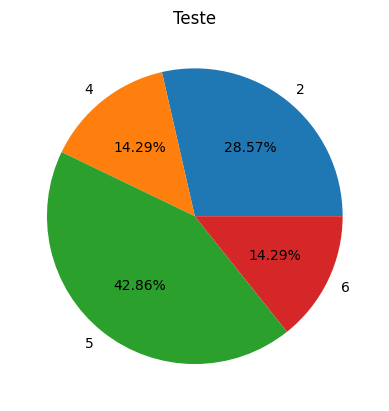

In [97]:
a = [2, 5, 6, 2, 5, 5]
b = [8, 9, 55, 14, 99, 2, 33, 56]
print(a)
add(a, 4)
graficoFreqRelativa(a, 'Teste')

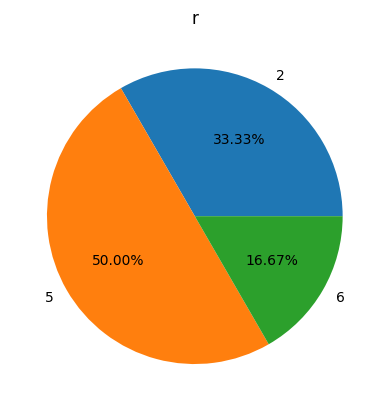

In [93]:
fig, ax = plt.subplots()
freqR = frequenciaRelativa(a)
porcentagem = []
valores = []
tam = len(freq)
for i in range(tam):
    porcentagem.append(freqR[i][1])
    valores.append(freqR[i][0])
#print(porcentagem, valores)    
    
ax.pie(porcentagem, labels=valores, autopct='%.2f%%')
ax.set_title('r')
plt.show()

In [75]:
frequenciaRelativa(a)

[[2, 33.333333333333336], [5, 50.0], [6, 16.666666666666668]]